In [1]:
from IPython.display import Image

# Correcting for Pileup in the Giorgio MOS Data

The MOS data from the recent epoch is piled up and previous sources in the literature have excluded it for this reason. An attempt to correct for pileup effects is undertaken using the following procedures:

1.   Only filtering for single pixel events using a SAS quality flag of 0 rather than <=12
* https://academic.oup.com/mnras/article/382/1/194/983832 states that using filtering of this type can mitigate pileup effects.
2.  Excising the core of the PSF following - https://www.cosmos.esa.int/web/xmm-newton/sas-thread-epatplot 
* Removing the cores of the source regions can act to lessen the effects of pileup

Combining both of these effects may improve the quality of the data and spectra will be plotted and their fit parameters compared with the fits on the piledup data.

## Revolution 2407

### Producing the pileup figures

#### Filtering the events file for single events only

<span style="color:red">**Ignore these commands**</span>

In [ ]:
evselect table=mos1.fits withfilteredset=yes expression='(PATTERN == 0)&&(PI in [200:10000])' filteredset=mos1_single_events.fits filtertype=expression keepfilteroutput=yes updateexposure=yes filterexposure=yes

In [ ]:
evselect table=mos2.fits withfilteredset=yes expression='(PATTERN == 0)&&(PI in [200:10000])' filteredset=mos2_single_events.fits filtertype=expression keepfilteroutput=yes updateexposure=yes filterexposure=yes

Running through the process below using a single events file failed to produce a histogram in the pileup plot, so the standard filtered mos data set was used but the central region was still removed.

### Defining centre-removed source regions

Initially a 3'' region was excised, equating to 61 physical units. Then increased to 6'' or 120 in physical units.

In [ ]:
evselect table=mos1_clean.fits energycolumn='PI' withfilteredset=yes filteredset=mos1_source_annulus.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos1_source_annulus_spectrum.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression="((X,Y) in ANNULUS(25611,23916,120,260))"

In [ ]:
evselect table=mos2_clean.fits energycolumn='PI' withfilteredset=yes filteredset=mos2_source_annulus.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos2_source_annulus_spectrum.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression="((X,Y) in ANNULUS(25611,23916,120,260))"

#### Defining the background regions

As the single events files did not work, the background set made previously was used. 

<span style="color:red">**Ignore these commands**</span>

In [ ]:
evselect table=mos1_single_events.fits withfilteredset=yes filteredset=mos1_single_events_bkg_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos1_single_events_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(25243,24416,191))'

In [ ]:
evselect table=mos2_single_events.fits withfilteredset=yes filteredset=mos2_single_events_bkg_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos2_single_events_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(25243,24416,191))'

Run these ones though:

In [ ]:
backscale spectrumset=mos1_source_annulus_spectrum.fits badpixlocation=mos1_clean.fits

In [ ]:
backscale spectrumset=mos2_source_annulus_spectrum.fits badpixlocation=mos2_clean.fits

#### Plotting Pileup 

In [ ]:
epatplot set=mos1_source_annulus.fits plotfile=mos1_source_annulus_pileup.ps useplotfile=yes withbackgroundset=yes backgroundset=mos1_bkg_region.fits

In [ ]:
epatplot set=mos2_source_annulus.fits plotfile=mos2_source_annulus_pileup.ps useplotfile=yes withbackgroundset=yes backgroundset=mos2_bkg_region.fits

The figures were plotted using `gv`.

### Pileup Figures

#### MOS1

Central radius 3''

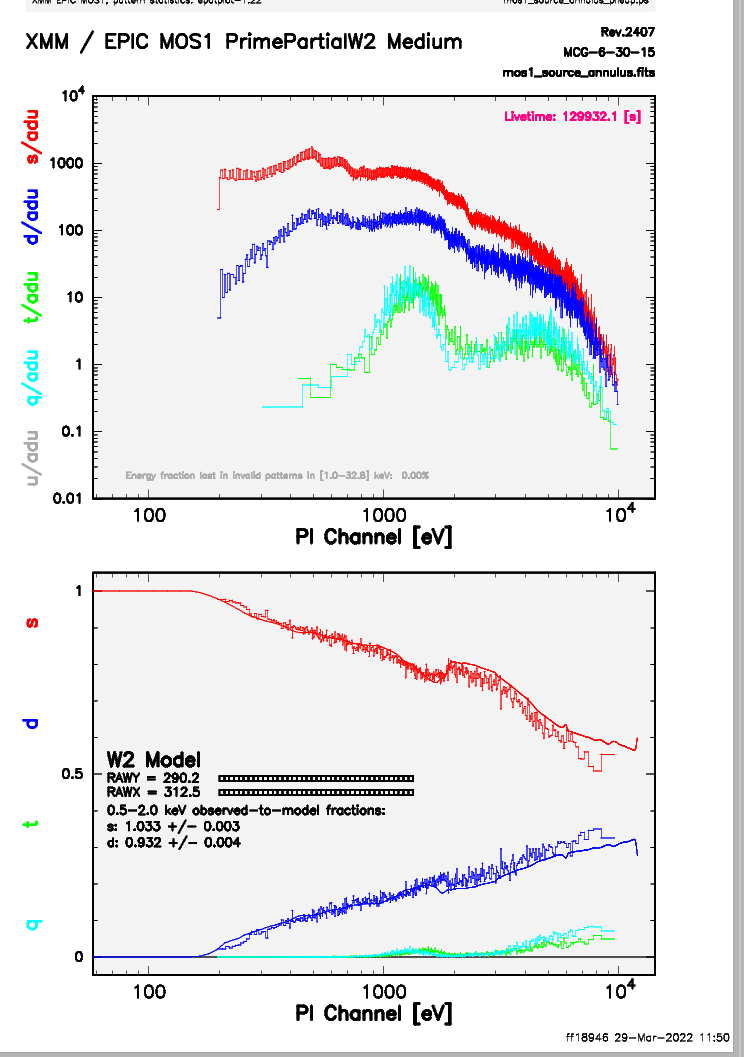

In [4]:
Image(filename="pileup_correction/2407_central_rad_61.png")

Central radius 6''

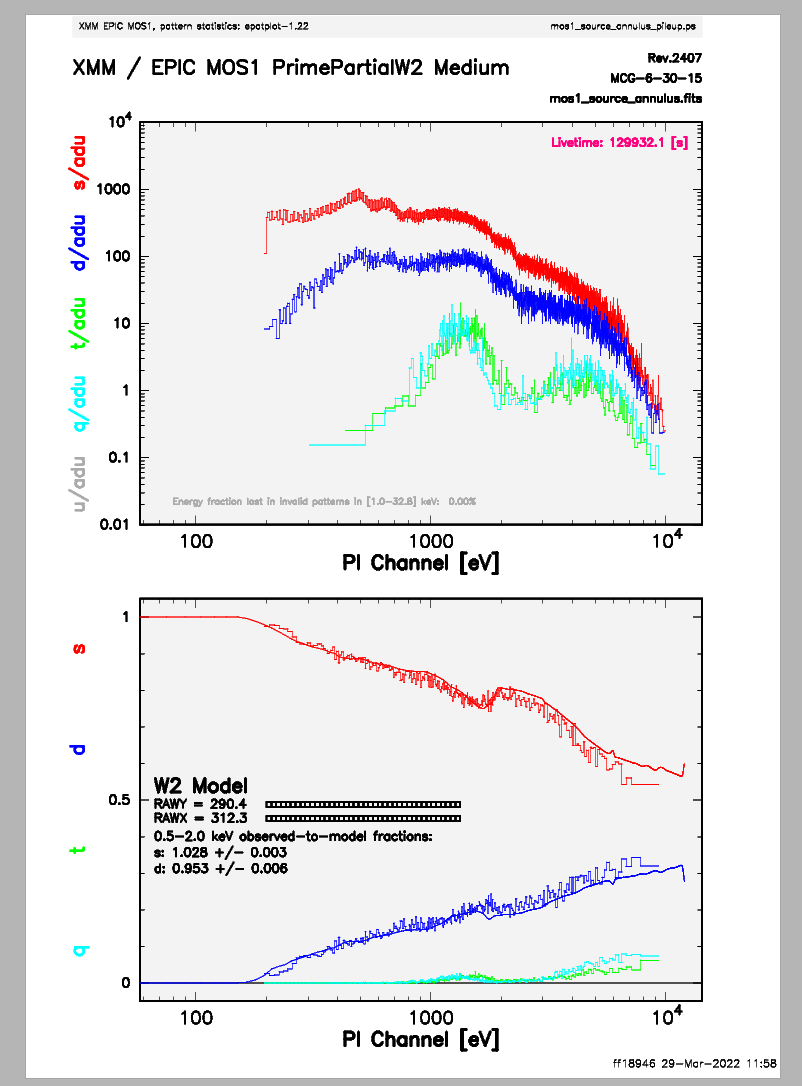

In [5]:
Image(filename="pileup_correction/2407_central_rad_120.png")

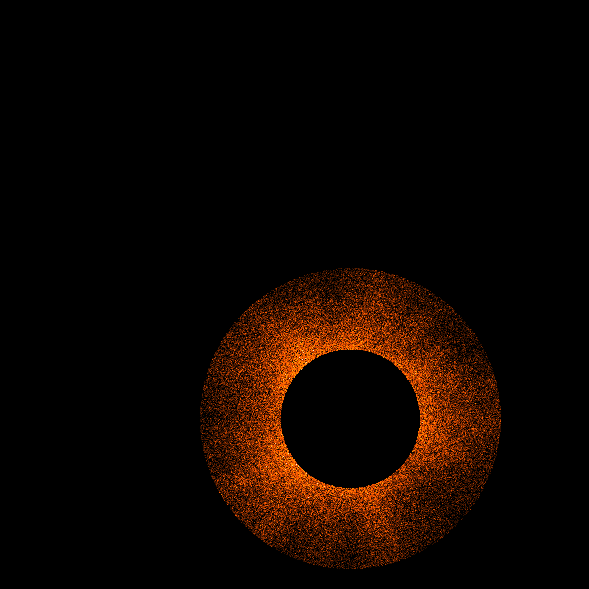

In [7]:
Image(filename="pileup_correction/2407_source_rad_120.png")

Increasing the central core radius beyond this point will likely act to worsen the data due to loss of flux.

#### MOS2

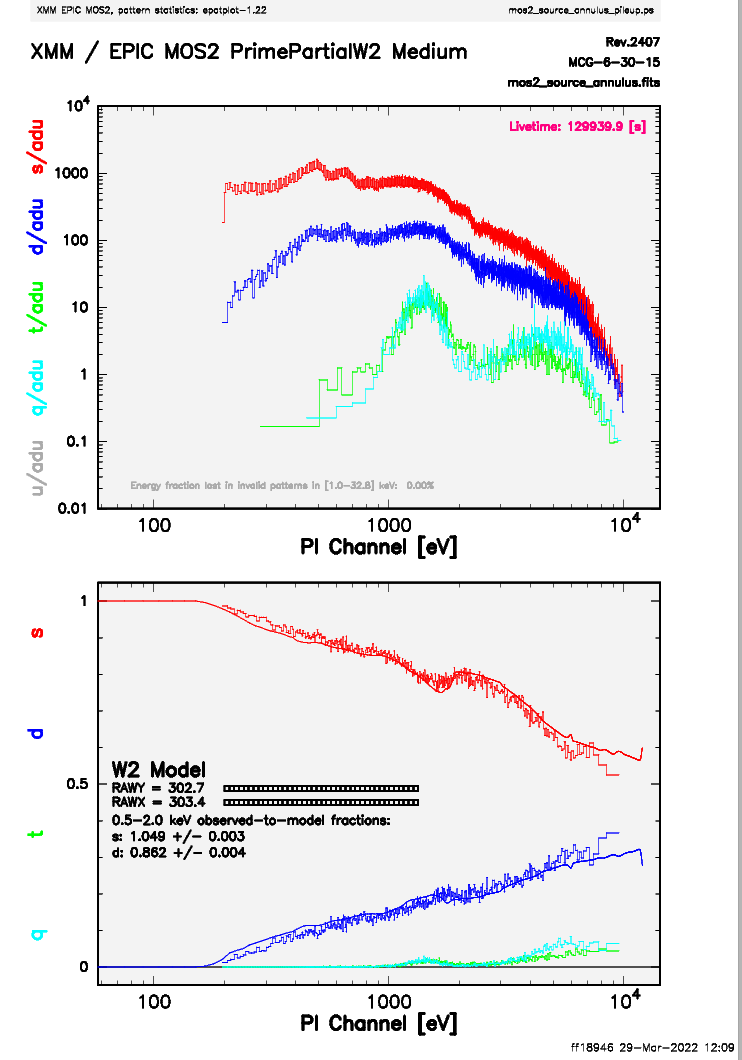

In [17]:
Image(filename="pileup_correction/2407_mos2_rad_61.png")

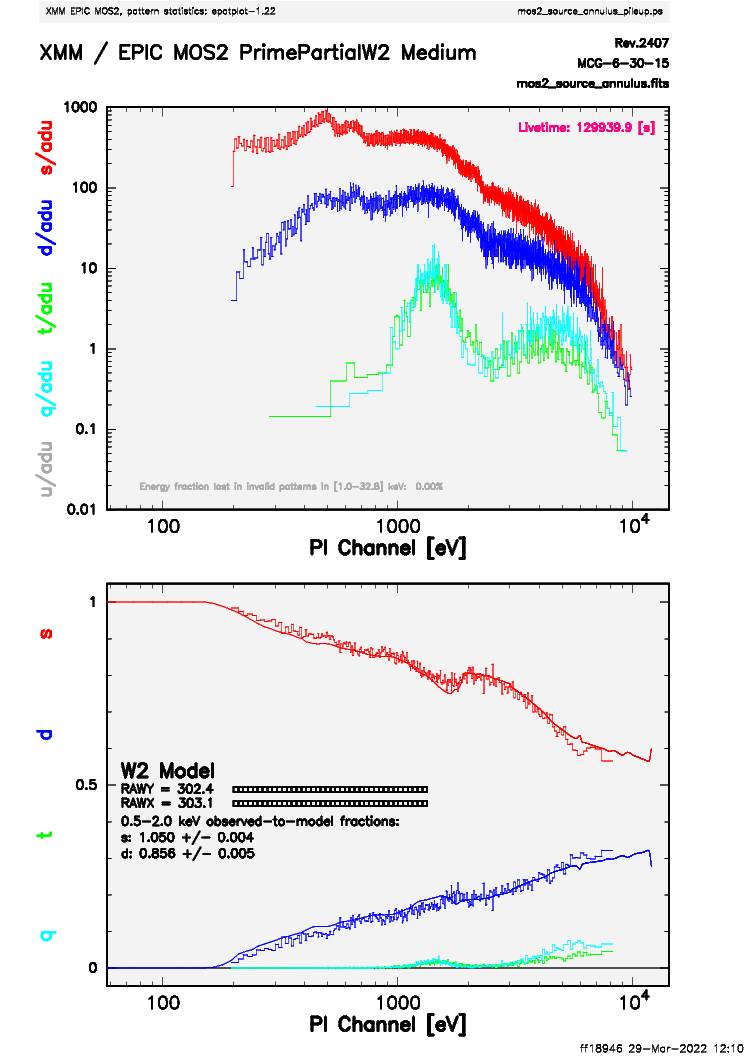

In [18]:
Image(filename="pileup_correction/2407_mos2_rad_120.png")

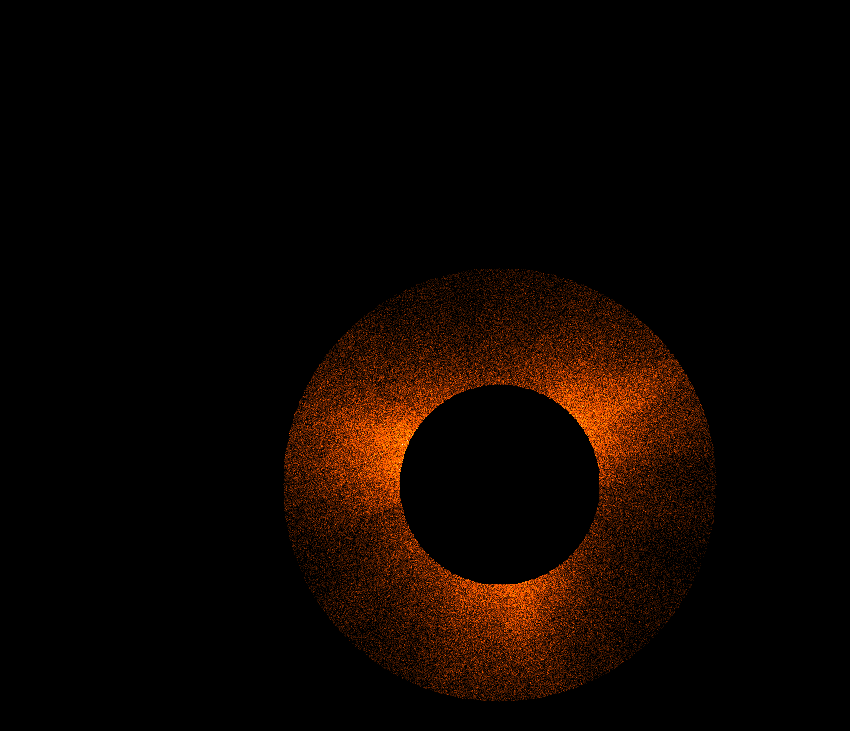

In [20]:
Image(filename="pileup_correction/2407_mos2_source.png")

### Corrected Lightcurves

To see the effect limiting the source region has on the flux, the lightcurves are plotted for both cameras.

In [ ]:
evselect table=mos1_filtered.fits energycolumn=PI expression="((X,Y) in ANNULUS(25611,23916,120,260))"  withrateset=yes rateset=mos1_source_annulus_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

In [ ]:
evselect table=mos2_filtered.fits energycolumn=PI expression="((X,Y) in ANNULUS(25611,23916,61,260))"  withrateset=yes rateset=mos2_source_annulus_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

The background lightcurves created previously were used.

In [ ]:
epiclccorr srctslist=mos1_source_annulus_lightcurve_raw.lc eventlist=mos1_filtered.fits outset=mos1_annulus_corrected_lc.lc bkgtslist=mos1_bkg_lightcurve_raw.lc withbkgset=yes applyabsolutecorrections=yes

In [ ]:
epiclccorr srctslist=mos2_source_annulus_lightcurve_raw.lc eventlist=mos2_filtered.fits outset=mos2_annulus_corrected_lc.lc bkgtslist=mos2_bkg_lightcurve_raw.lc withbkgset=yes applyabsolutecorrections=yes

In [ ]:
dsplot table=mos1_annulus_corrected_lc.lc x=TIME y=RATE &

In [ ]:
dsplot table=mos2_annulus_corrected_lc.lc x=TIME y=RATE &

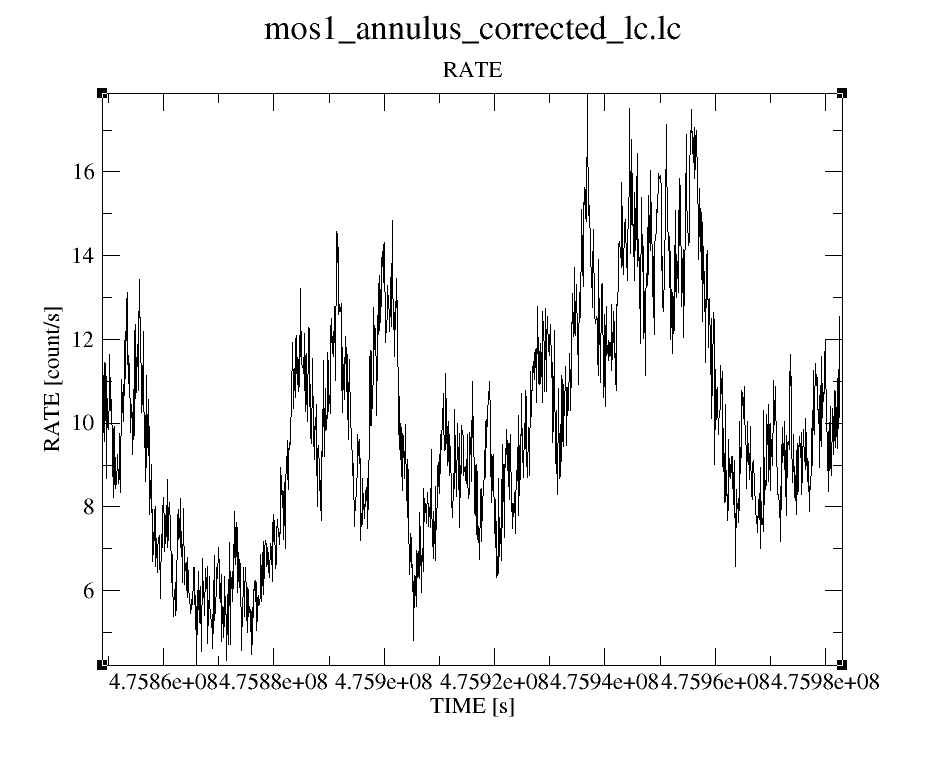

In [10]:
Image(filename="pileup_correction/2407_mos1_lc.png")

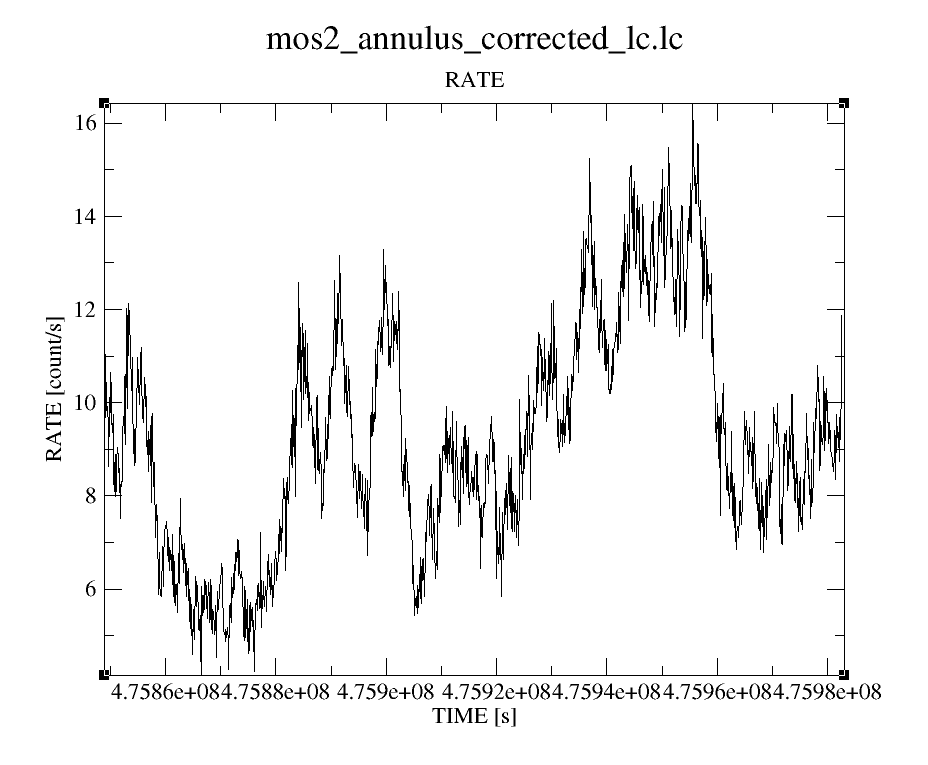

In [11]:
Image(filename="pileup_correction/2407_mos2_lc.png")

### Spectra

#### Preparing the Spectra

##### MOS1

In [ ]:
evselect table=mos1_clean.fits expression="((X,Y) in ANNULUS(25611,23916,120,260))" withspectrumset=yes spectrumset=mos1_src_pileup_corr_spec.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI 

In [ ]:
backscale spectrumset=mos1_src_pileup_corr_spec.ds badpixlocation=mos1_clean.fits

Use previous background set `bkg_spectrum_mos1.ds`.

In [ ]:
rmfgen spectrumset=mos1_src_pileup_corr_spec.ds rmfset=mos1_pileup_corr.rmf

In [ ]:
arfgen spectrumset=mos1_src_pileup_corr_spec.ds arfset=mos1_pileup_corr.arf withrmfset=yes rmfset=mos1_pileup_corr.rmf badpixlocation=mos1_clean.fits detmaptype=psf

##### MOS2

In [ ]:
evselect table=mos2_clean.fits expression="((X,Y) in ANNULUS(25611,23916,120,260))" withspectrumset=yes spectrumset=mos2_src_pileup_corr_spec.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI 

In [ ]:
backscale spectrumset=mos2_src_pileup_corr_spec.ds badpixlocation=mos2_clean.fits

In [ ]:
rmfgen spectrumset=mos2_source_annulus_spectrum.fits rmfset=mos2_pileup_corr.rmf

In [ ]:
arfgen spectrumset=mos2_source_annulus_spectrum.fits arfset=mos2_pileup_corr.arf withrmfset=yes rmfset=mos2_pileup_corr.rmf badpixlocation=mos2_filtered.fits detmaptype=psf

The files that have been created needed to plot a spectrum in xspec and to merge all the mos data later are:

source:      `mos1_src_pileup_corr_spec.ds`

background:  `bkg_spectrum_mos1.ds`

rmf:         `mos1_pileup_corr.rmf` 

arf:         `mos1_pileup_corr.arf` 

## Revolution 2408

## Revolution 2409